# Analysis (Simple)

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import analyze_tools
from sklearn import preprocessing

df = pd.read_csv('../data/clean_game_data.csv', index_col=0)


print(df.columns)

Index(['Side', 'Region', 'Year', 'Game ID', 'Team', 'Victory', 'Game Duration',
       'Player', 'Role', 'Kills', 'Deaths', 'Assists', 'KDA', 'CS',
       'CS in Team's Jungle', 'CSM', 'Golds', 'GPM', 'GOLD%', 'Vision Score',
       'Wards placed', 'Wards destroyed', 'Control Wards Purchased', 'VSPM',
       'WPM', 'VWPM', 'WCPM', 'VS%', 'Total damage to Champion',
       'Physical Damage', 'Magic Damage', 'True Damage', 'DPM', 'DMG%',
       'K+A Per Minute', 'KP%', 'Solo kills', 'Double kills', 'Triple kills',
       'Quadra kills', 'Penta kills', 'GD@15', 'CSD@15', 'XPD@15', 'LVLD@15',
       'Damage dealt to turrets', 'Total heal', 'Time ccing others',
       'Total damage taken'],
      dtype='object')


In [4]:
df.describe()

,Year,Game ID,Game Duration,Kills,Deaths,Assists,KDA,CS,CS in Team's Jungle,CSM,...,Quadra kills,Penta kills,GD@15,CSD@15,XPD@15,LVLD@15,Damage dealt to turrets,Total heal,Time ccing others,Total damage taken
count,65840.000000,65840.000000,65840.000000,65840.000000,65840.000000,65840.000000,65840.000000,65840.000000,65840.000000,65840.000000,...,65840.000000,65840.000000,65840.00000,65840.000000,65840.000000,65840.00000,65840.000000,65840.000000,65840.000000,65840.000000
mean,2021.510024,36428.523694,32.719491,2.493211,2.498967,5.790340,5.048887,213.546598,34.873663,6.538322,...,0.006334,0.001747,0.00000,0.000000,0.000000,0.00000,2752.477840,5968.694411,17.641282,18536.930058
std,1.089791,9540.604536,5.788765,2.450838,1.804162,4.109824,4.724587,111.951057,49.950538,3.189439,...,0.080849,0.041757,894.93387,17.009472,704.424984,0.75687,3359.463808,5739.623482,14.278177,9085.180362
min,2020.000000,20708.000000,16.833000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-5208.00000,-125.000000,-4195.000000,-4.00000,0.000000,0.000000,0.000000,445.000000
25%,2021.000000,28329.000000,28.617000,1.000000,1.000000,3.000000,1.300000,152.000000,1.000000,4.900000,...,0.000000,0.000000,-506.00000,-10.000000,-438.000000,0.00000,286.000000,1802.000000,9.000000,11744.000000
50%,2021.000000,35390.500000,32.017000,2.000000,2.000000,5.000000,3.300000,231.000000,12.000000,7.500000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,1496.000000,3998.000000,15.000000,16759.500000
75%,2022.000000,44368.250000,36.033000,4.000000,4.000000,8.000000,8.000000,291.000000,37.000000,9.000000,...,0.000000,0.000000,506.00000,10.000000,438.000000,0.00000,4123.000000,8557.000000,23.000000,23768.000000
max,2023.000000,53624.000000,70.267000,19.000000,12.000000,32.000000,27.000000,645.000000,291.000000,13.200000,...,2.000000,1.000000,5208.00000,125.000000,4195.000000,4.00000,61490.000000,64434.000000,288.000000,76316.000000


In [5]:
# Roles possibles :
display(pd.unique(df['Role']))
# Victoires
display(pd.unique(df['Victory']))
# Régions
display(pd.unique(df['Region']))
# Années
display(pd.unique(df['Year']))

array(['TOP', 'JUNGLE', 'MID', 'ADC', 'SUPPORT'], dtype=object)

array([False,  True])

array(['WORLDS', 'LEC', 'LCK', 'LCS', 'MSI'], dtype=object)

array([2023, 2022, 2021, 2020])

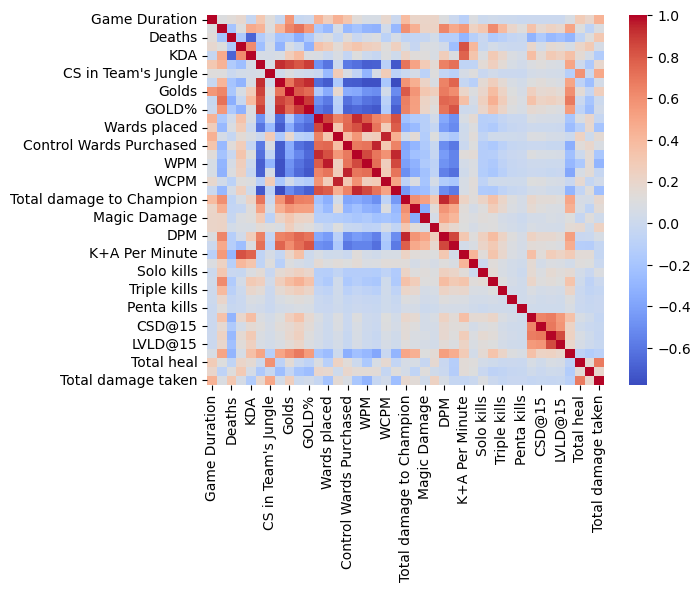

In [6]:
# Analyse de la corrélation entre les variables
numdf = df.select_dtypes(include='number').drop(columns=['Year', 'Game ID'])
analyze_tools.corr_heatmap(numdf)

In [7]:
# Listing des variables qui semblent corrélées


scaler = preprocessing.StandardScaler()
norm_data = pd.DataFrame(scaler.fit_transform(numdf), columns=numdf.columns)
corr = norm_data.corr()
for i in range(len(corr.columns)):
    for j in range(i, len(corr.columns)):
        if abs(corr.iloc[i, j]) > 0.7 and i < j:
            if corr.iloc[i, j] < 0:
                print(f"La variable {corr.columns[i]} est corrélée NÉGATIVEMENT avec la variable {corr.columns[j]} avec un coefficient de {corr.iloc[i, j]}")
            else:
                print(f"La variable {corr.columns[i]} est corrélée POSITIVEMENT avec la variable {corr.columns[j]} avec un coefficient de {corr.iloc[i, j]}")

La variable Kills est corrélée POSITIVEMENT avec la variable GPM avec un coefficient de 0.7124313668572255
La variable Assists est corrélée POSITIVEMENT avec la variable K+A Per Minute avec un coefficient de 0.8204297024502373
La variable KDA est corrélée POSITIVEMENT avec la variable K+A Per Minute avec un coefficient de 0.7659243736537588
La variable CS est corrélée POSITIVEMENT avec la variable CSM avec un coefficient de 0.9291370279933653
La variable CS est corrélée POSITIVEMENT avec la variable Golds avec un coefficient de 0.8687672298216952
La variable CS est corrélée POSITIVEMENT avec la variable GPM avec un coefficient de 0.8078598637412887
La variable CS est corrélée POSITIVEMENT avec la variable GOLD% avec un coefficient de 0.885455531748034
La variable CS est corrélée NÉGATIVEMENT avec la variable VS% avec un coefficient de -0.7234469929648826
La variable CS est corrélée POSITIVEMENT avec la variable Total damage to Champion avec un coefficient de 0.701512267403159
La variab

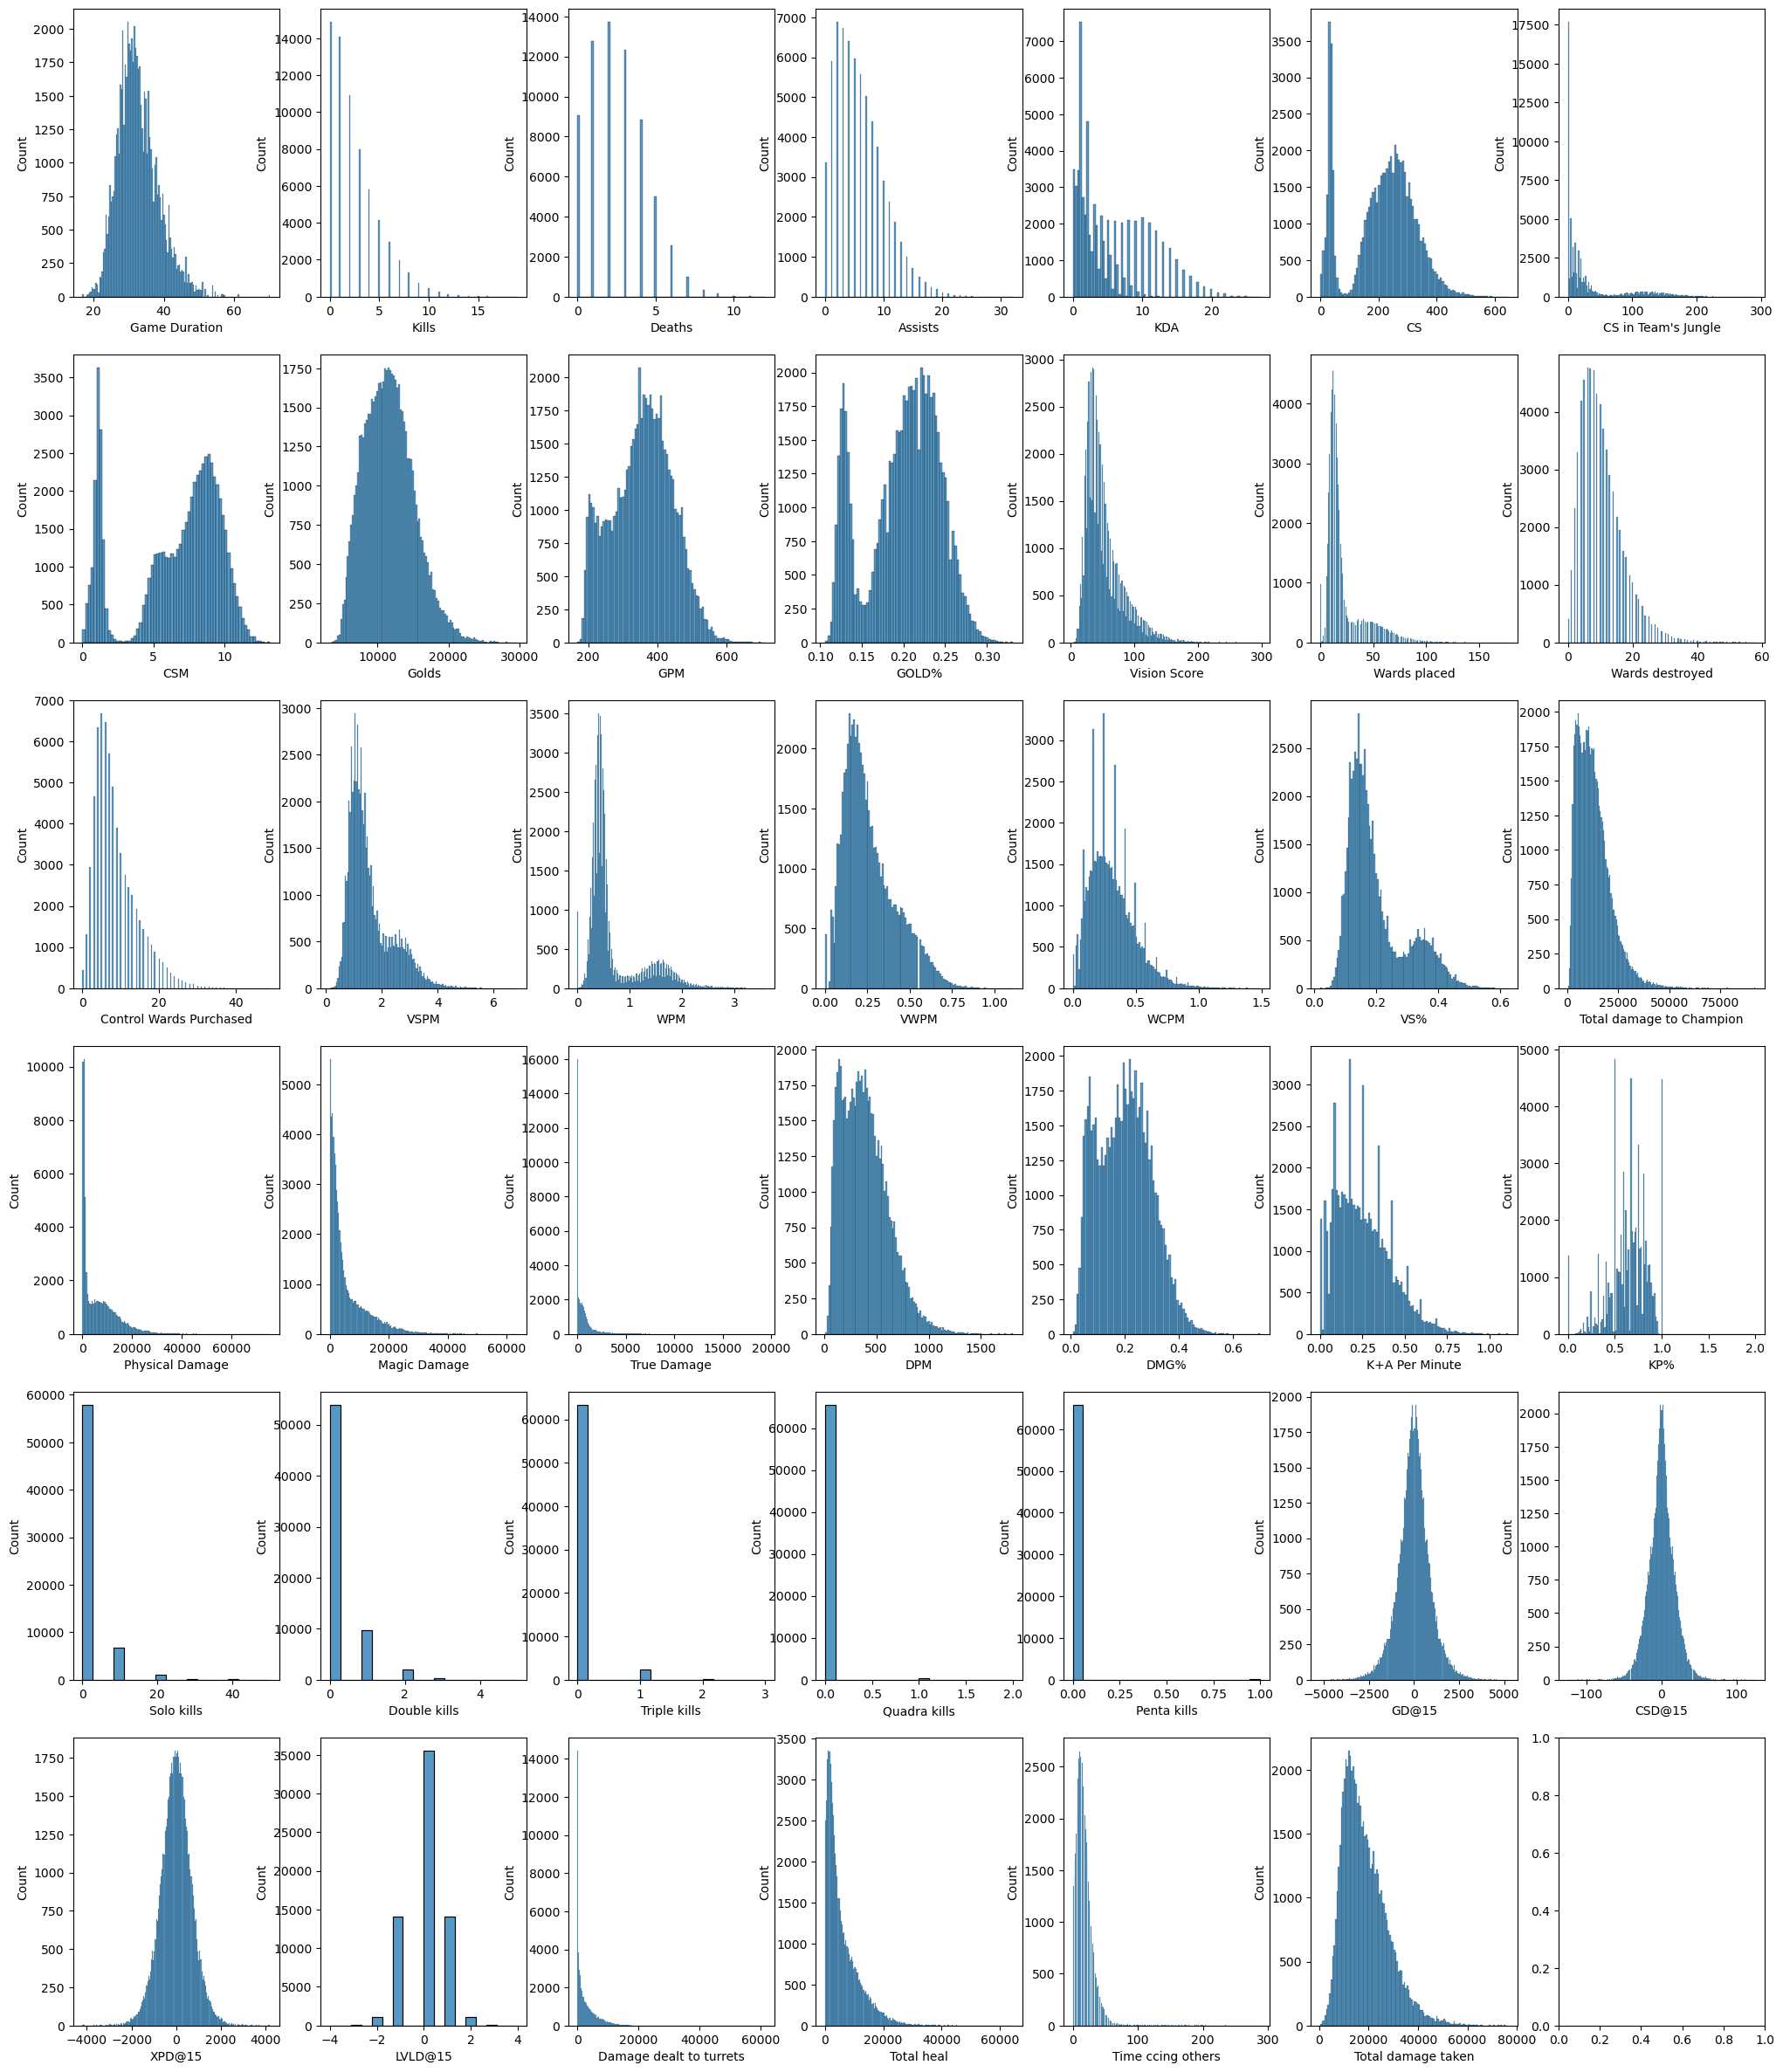

In [8]:
# Analyse de la distribution des variables

# Distribution des variables

figsize=(25, 30)
fig, axes = plt.subplots(6, 7, figsize=figsize)

i = 0
j = 0
for col in numdf.columns:
    if j != 0 and j % 7 == 0:
        i += 1
        j = 0
    sns.histplot(numdf[col], ax=axes[i, j])
    j += 1

plt.show()

Certaines variables semble avoir une distribution symétrique tel que : CSD@15, GD@15, XPD@15.
C'est dû au fait que ce sont des statistiques qui sont inversement corréllé avec l'adversaire : par exemple CSD@15 veut dire le differentiel de CS à 15 minutes par rapport à l'adversaire du même role. Avoir 15 CSD@15 veut dire que l'adversaire a -15.

Au niveau de la colonne CS, on remarque qu'il y a semblablement deux distributions. On suppose que ce sont les support dans le jeu qui ne collecte pas beaucoup de CS pour les donner à ses coéquipiers qui ont besoin de plus de gold.

## Visualisation des différence entre role et support et autre roles

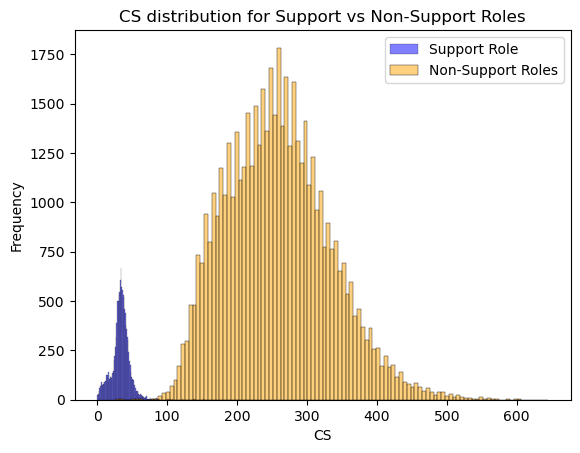

In [9]:
supportdf = df[df['Role'] == 'SUPPORT']
notsupportdf = df[df['Role'] != 'SUPPORT']

# Plotting CS distribution for support role
sns.histplot(supportdf['CS'], color='blue', alpha=0.5, label='Support Role')
sns.histplot(notsupportdf['CS'], color='orange', alpha=0.5, label='Non-Support Roles')

plt.xlabel('CS')
plt.ylabel('Frequency')
plt.title('CS distribution for Support vs Non-Support Roles')

plt.legend()
plt.show()

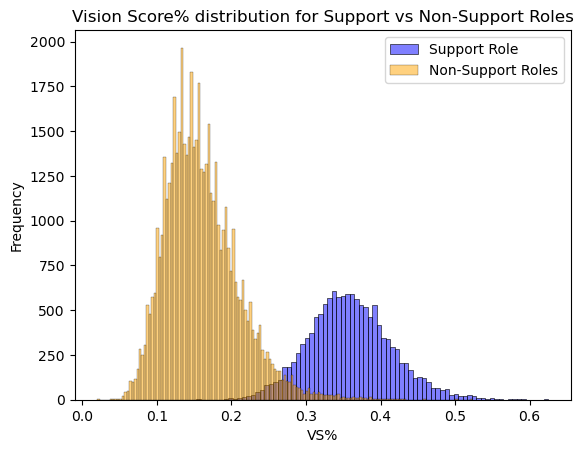

Support Role
count    13168.000000
mean         0.358990
std          0.056099
min          0.153000
25%          0.322000
50%          0.356000
75%          0.394000
max          0.625000
Name: VS%, dtype: float64
Non-Support Roles
count    52672.000000
mean         0.160252
std          0.048960
min          0.020000
25%          0.126000
50%          0.153000
75%          0.188000
max          0.523000
Name: VS%, dtype: float64


In [10]:
# Comparing VS% distribution for support and non-support roles

sns.histplot(supportdf['VS%'], color='blue', alpha=0.5, label='Support Role')
sns.histplot(notsupportdf['VS%'], color='orange', alpha=0.5, label='Non-Support Roles')

plt.xlabel('VS%')
plt.ylabel('Frequency')
plt.title('Vision Score% distribution for Support vs Non-Support Roles')

plt.legend()
plt.show()

# mean, std

print("Support Role")
print(supportdf['VS%'].describe())
print("Non-Support Roles")
print(notsupportdf['VS%'].describe())

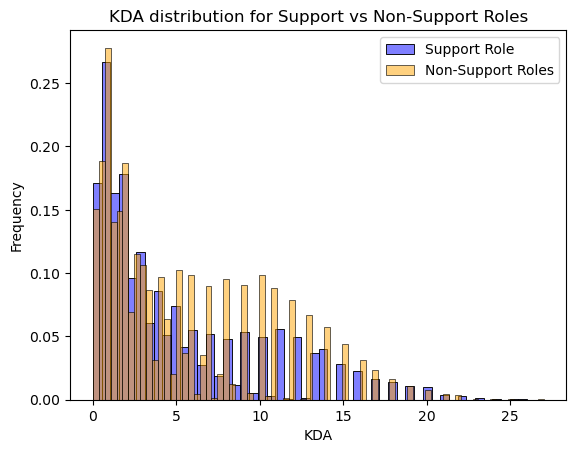

Support Role
count    13168.000000
mean         4.940067
std          4.828888
min          0.000000
25%          1.300000
50%          3.000000
75%          7.500000
max         26.000000
Name: KDA, dtype: float64
Non-Support Roles
count    52672.000000
mean         5.076092
std          4.697803
min          0.000000
25%          1.300000
50%          3.300000
75%          8.000000
max         27.000000
Name: KDA, dtype: float64


In [11]:
# Comparing KDA distribution for support and non-support roles, normalized to percentage of population

sns.histplot(supportdf['KDA'], color='blue', alpha=0.5, label='Support Role', stat='density')
sns.histplot(notsupportdf['KDA'], color='orange', alpha=0.5, label='Non-Support Roles', stat='density')

plt.xlabel('KDA')
plt.ylabel('Frequency')
plt.title('KDA distribution for Support vs Non-Support Roles')

plt.legend()
plt.show()

# mean, std

print("Support Role")
print(supportdf['KDA'].describe())
print("Non-Support Roles")
print(notsupportdf['KDA'].describe())

L'apport en vision du support est considérablement plus conséquent chez les support que les autres roles, tandis que les autres roles on plus de "CS" c'est à dire qu'ils ont plus accès aux "creeps" qui permettent d'obtenir des golds.

Au niveau du KDA, les support sont plus performant. Mais ça peut être interprété en partie dû au fait que les assist sont pondérés de la même manière que un kill dans cette statistique et que les personnage de support ont souvent des caractéristiques qui permettent "d'aider" les autres joueurs à faire des kills (d'où le role support).

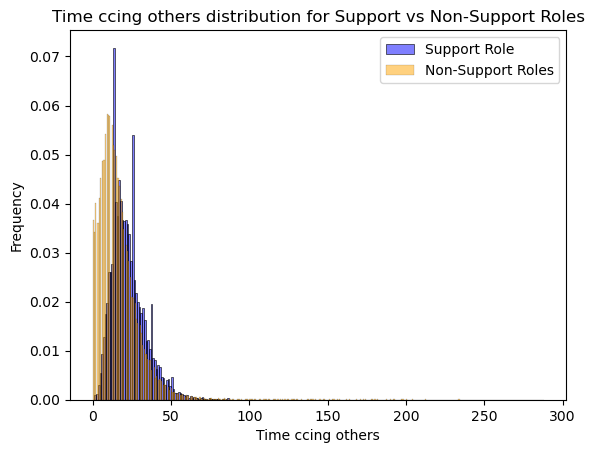

Support Role
count    13168.000000
mean        22.548830
std         11.038471
min          1.000000
25%         15.000000
50%         21.000000
75%         28.000000
max         87.000000
Name: Time ccing others, dtype: float64
Non-Support Roles
count    52672.000000
mean        16.414395
std         14.725735
min          0.000000
25%          8.000000
50%         14.000000
75%         22.000000
max        288.000000
Name: Time ccing others, dtype: float64


In [12]:
# Time ccing others for support vs non-support roles

sns.histplot(supportdf['Time ccing others'], color='blue', alpha=0.5, label='Support Role', stat='density')
sns.histplot(notsupportdf['Time ccing others'], color='orange', alpha=0.5, label='Non-Support Roles', stat='density')

plt.xlabel('Time ccing others')
plt.ylabel('Frequency')
plt.title('Time ccing others distribution for Support vs Non-Support Roles')

plt.legend()
plt.show()

# mean, std

print("Support Role")
print(supportdf['Time ccing others'].describe())

print("Non-Support Roles")
print(notsupportdf['Time ccing others'].describe())

La caractéristique du rôle de support peut aussi se retrouver au niveau du temps à "CC" les auters (c'est à dire immobiliser les adversaires, ce qui compte pour un assist si cela mène vers un kill).

In [13]:
# Verification de la corrélation du temps passé à CC les autres avec le rôle de support avec le KDA

print("Corrélation entre le temps passé à CC les autres et le KDA pour le rôle de support")
print(supportdf[['Time ccing others', 'KDA']].corr())

Corrélation entre le temps passé à CC les autres et le KDA pour le rôle de support
                   Time ccing others       KDA
Time ccing others           1.000000  0.016321
KDA                         0.016321  1.000000


Néanmoins, il semblerait que cette statistique n'a pas du tout une corrélation avec le KDA même pour les supports.

Expliquable par le fait que le KDA dépends aussi de beaucoup d'autres facteurs (kills, morts etc)

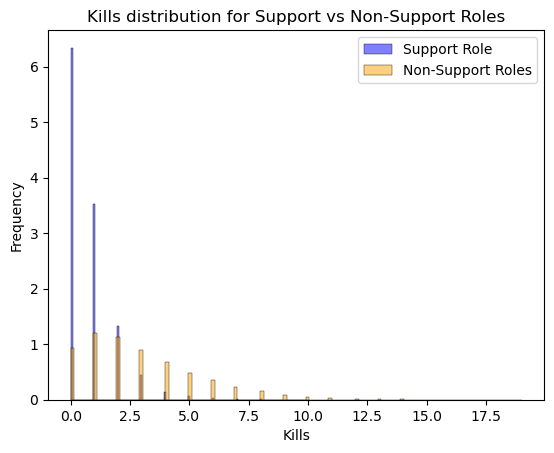

In [14]:
# Distribution du nombre de kill pour le rôle de support et les autres rôles

sns.histplot(supportdf['Kills'], color='blue', alpha=0.5, label='Support Role', stat='density')
sns.histplot(notsupportdf['Kills'], color='orange', alpha=0.5, label='Non-Support Roles', stat='density')

plt.xlabel('Kills')
plt.ylabel('Frequency')
plt.title('Kills distribution for Support vs Non-Support Roles')

plt.legend()
plt.show()

On voit bien que le role de support ont en général moins de kill que les autres rôles

## Visualisation du role d'ADC

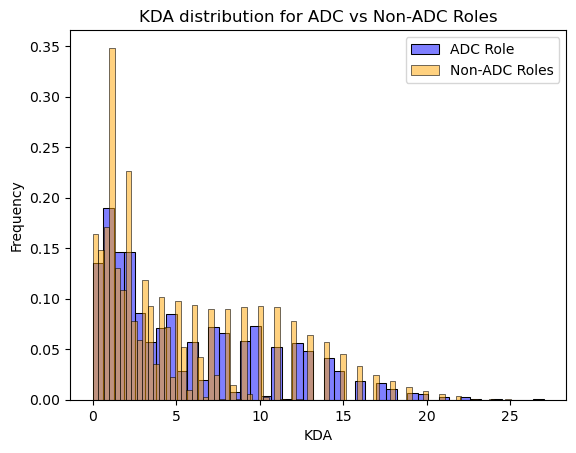

ADC Role
count    13168.000000
mean         5.623071
std          4.876855
min          0.000000
25%          1.500000
50%          4.000000
75%          9.000000
max         27.000000
Name: KDA, dtype: float64


In [15]:
# Distribution du KDA pour les ADC et les autres rôles

adcdf = df[df['Role'] == 'ADC']
notadcdf = df[df['Role'] != 'ADC']

sns.histplot(adcdf['KDA'], color='blue', alpha=0.5, label='ADC Role', stat='density')
sns.histplot(notadcdf['KDA'], color='orange', alpha=0.5, label='Non-ADC Roles', stat='density')

plt.xlabel('KDA')
plt.ylabel('Frequency')
plt.title('KDA distribution for ADC vs Non-ADC Roles')

plt.legend()
plt.show()

# mean, std

print("ADC Role")
print(adcdf['KDA'].describe())

Les ADC semble avoir un haut KDA, dû au rôle intrinsèque d'ADC qui en générale gravite autour de ne pas mourir en début de game et accumuler du gold pour acheter des items qui permettent d'atteindre des pics de puissance pour permettre d'infliger beaucoup de dégâts.

Ils ont une certaine importance dans les combats en 5v5 où il est assez important que le ADC reste vivant pour infliger les dégats à l'ennemi, l'intérêt de l'ennemi est biensur de tuer l'ADC adverse pour diminuer le potentiel létal de l'équipe adverse pendant le teamfight.

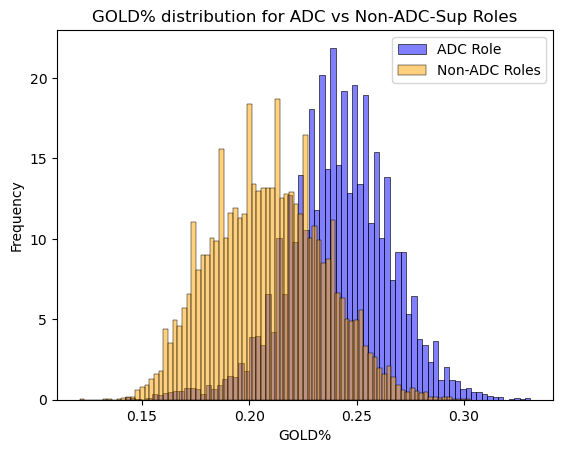

In [16]:
# Distribution du GOLD% pour les ADC et les autres rôles

notadcsup = df[(df['Role'] != 'ADC') & (df['Role'] != 'SUPPORT')]

sns.histplot(adcdf['GOLD%'], color='blue', alpha=0.5, label='ADC Role', stat='density')
sns.histplot(notadcsup['GOLD%'], color='orange', alpha=0.5, label='Non-ADC Roles', stat='density')

plt.xlabel('GOLD%')
plt.ylabel('Frequency')
plt.title('GOLD% distribution for ADC vs Non-ADC-Sup Roles')

plt.legend()

## Clustering des profils de support

In [17]:
# Clustering pour les roles de support

from sklearn.cluster import KMeans

# On ne garde que les variables numériques
supportdf = df[df['Role'] == 'SUPPORT']
supportdf_clustering = supportdf.select_dtypes(include='number')

# On normalise les données
scaler = preprocessing.StandardScaler()
supportdf_clustering = pd.DataFrame(scaler.fit_transform(supportdf_clustering), columns=supportdf_clustering.columns)

# On applique le clustering
kmeans = KMeans(n_clusters=7)
supportdf_clustering['Cluster'] = kmeans.fit_predict(supportdf_clustering)

# On affiche les clusters

sns.pairplot(supportdf_clustering, hue='Cluster')
plt.show()

/opt/miniconda3/envs/dac/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 